In [39]:
import pandas as pd
import datetime
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
import os

In [40]:
df = pd.read_csv('dataset.csv')
df.head()

,Day,Exchange rate
0,2022-09-17,60.0316
1,2022-09-16,59.6663
2,2022-09-15,59.7751
3,2022-09-14,60.0676
4,2022-09-13,60.4568


In [41]:
df.rename(columns={"Day": "day", "Exchange rate": "exchange_rate"}, inplace=True)
df

,day,exchange_rate
0,2022-09-17,60.0316
1,2022-09-16,59.6663
2,2022-09-15,59.7751
3,2022-09-14,60.0676
4,2022-09-13,60.4568
...,...,...
6926,1992-07-15,130.2000
6927,1992-07-10,130.3000
6928,1992-07-08,130.5000
6929,1992-07-03,134.8000


In [42]:
df.isnull().sum()

day              0
exchange_rate    0
dtype: int64

In [43]:
df['deviation_from_median'] = abs(df['exchange_rate'] - df['exchange_rate'].median())
#считаем отклонение от медианы 
df['deviation_from_avarege_value'] = abs(df['exchange_rate'] - df['exchange_rate'].mean())
#считаем отклонение среднего значения
df

,day,exchange_rate,deviation_from_median,deviation_from_avarege_value
0,2022-09-17,60.0316,28.4666,444.768891
1,2022-09-16,59.6663,28.1013,445.134191
2,2022-09-15,59.7751,28.2101,445.025391
3,2022-09-14,60.0676,28.5026,444.732891
4,2022-09-13,60.4568,28.8918,444.343691
...,...,...,...,...
6926,1992-07-15,130.2000,98.6350,374.600491
6927,1992-07-10,130.3000,98.7350,374.500491
6928,1992-07-08,130.5000,98.9350,374.300491
6929,1992-07-03,134.8000,103.2350,370.000491


In [44]:
def filter_by_avg(pd: pd.DataFrame, value: int) -> pd.DataFrame:
    """Write a function that takes as input a DataFrame 
    and a value of deviation from the average rate value, 
    and returns a DataFrame filtered by the value of 
    deviation from the average rate value.
    """
    pf = df[df['deviation_from_avarege_value'] >= value]
    return pf

filter_by_avg(pd, df['exchange_rate'].mean())
df

,day,exchange_rate,deviation_from_median,deviation_from_avarege_value
0,2022-09-17,60.0316,28.4666,444.768891
1,2022-09-16,59.6663,28.1013,445.134191
2,2022-09-15,59.7751,28.2101,445.025391
3,2022-09-14,60.0676,28.5026,444.732891
4,2022-09-13,60.4568,28.8918,444.343691
...,...,...,...,...
6926,1992-07-15,130.2000,98.6350,374.600491
6927,1992-07-10,130.3000,98.7350,374.500491
6928,1992-07-08,130.5000,98.9350,374.300491
6929,1992-07-03,134.8000,103.2350,370.000491


In [45]:
filter_by_avg(pd, df['exchange_rate'].mean())

,day,exchange_rate,deviation_from_median,deviation_from_avarege_value
6133,1997-12-30,5960.0,5928.435,5455.199509
6134,1997-12-27,5958.0,5926.435,5453.199509
6135,1997-12-26,5955.0,5923.435,5450.199509
6136,1997-12-25,5955.0,5923.435,5450.199509
6137,1997-12-24,5950.0,5918.435,5445.199509
...,...,...,...,...
6833,1993-06-18,1090.0,1058.435,585.199509
6834,1993-06-16,1116.0,1084.435,611.199509
6835,1993-06-09,1104.0,1072.435,599.199509
6836,1993-06-04,1072.0,1040.435,567.199509


In [46]:
def sorted_by_dates(pd: pd.DataFrame, data_from: str, data_to: str) -> pd.DataFrame:
    df['day'] = pd.to_datetime(df['day'], format='%Y-%m')
    pf = df.loc[(df['day'] <= data_from) & (df['day'] >= data_to)]
    return pf

In [47]:
sorted_by_dates(pd, '2022-9-15', '2020-02-02')

,day,exchange_rate,deviation_from_median,deviation_from_avarege_value
2,2022-09-15,59.7751,28.2101,445.025391
3,2022-09-14,60.0676,28.5026,444.732891
4,2022-09-13,60.4568,28.8918,444.343691
5,2022-09-10,60.4696,28.9046,444.330891
6,2022-09-09,60.8010,29.2360,443.999491
...,...,...,...,...
641,2020-02-08,63.4720,31.9070,441.328491
642,2020-02-07,62.7977,31.2327,442.002791
643,2020-02-06,63.1742,31.6092,441.626291
644,2020-02-05,63.4342,31.8692,441.366291


In [48]:
def sorted_by_month(pd: pd.DataFrame, month: int) -> Tuple[pd.DataFrame, int]:
    df['month'] = df['day'].dt.month
    pf = df[df['month'] == month]
    return pf, pf['exchange_rate'].mean()

In [49]:
sorted_by_month(pd, 2)

(            day  exchange_rate  deviation_from_median  \
 139  2022-02-26        83.5485                51.9835   
 140  2022-02-25        86.9288                55.3638   
 141  2022-02-23        80.4194                48.8544   
 142  2022-02-22        76.7671                45.2021   
 143  2022-02-19        75.7619                44.1969   
 ...         ...            ...                    ...   
 6866 1993-02-17       559.0000               527.4350   
 6867 1993-02-12       560.0000               528.4350   
 6868 1993-02-10       561.0000               529.4350   
 6869 1993-02-05       572.0000               540.4350   
 6870 1993-02-03       572.0000               540.4350   
 
       deviation_from_avarege_value  month  
 139                     421.251991      2  
 140                     417.871691      2  
 141                     424.381091      2  
 142                     428.033391      2  
 143                     429.038591      2  
 ...                            

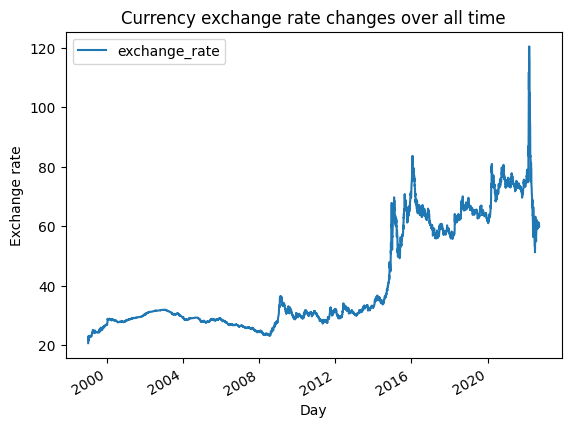

In [50]:
df['day'] = pd.to_datetime(df['day'], format='%Y-%m-%d')
pf = df.loc[(df['day'] > '1999-01-01')]
pf
pf.plot(x = 'day', y = 'exchange_rate')
plt.ylabel('Exchange rate')
plt.xlabel('Day')
plt.title('Сurrency exchange rate changes over all time')
plt.show()

# Пункт 
Задание

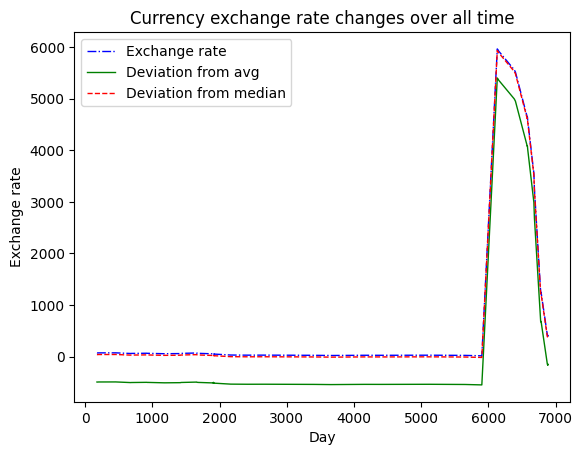

In [51]:
def draw_weeks_stat(pd: pd.DataFrame, month: int) -> None:
    df['month'] = df['day'].dt.month
    sf = df[df['month'] == month]


    x = sf['exchange_rate']

    y1 = sf['exchange_rate'] - sf['exchange_rate'].mean()
    y2 = sf['exchange_rate'] - sf ['exchange_rate'].median()


    plt.ylabel('Exchange rate')
    plt.xlabel('Day')
    plt.plot(x, color='blue', linestyle='-.', linewidth=1, label='Exchange rate')
    plt.plot(y1, color='green', linestyle='-', linewidth=1, label='Deviation from avg')
    plt.plot(y2, color='red', linestyle='--', linewidth=1, label='Deviation from median')
    plt.legend()
    plt.title('Сurrency exchange rate changes over all time')
    plt.show()

draw_weeks_stat(df, 12)



In [52]:
os.system("dollar.jpg.jpg")


0